In [1]:
# Works best with jupyter-notebook

In [86]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import roboticstoolbox as rtb
import spatialmath.base.symbolic as sym
import math
from spatialmath import *
from spatialmath.base import sym
from collections import namedtuple
import roboticstoolbox.tools.trajectory as tr
import matplotlib.pyplot as plt


np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

##### Lecture 6.1

A very simple (1 joint) robot 
(ETS in 2D)

In [76]:
#Create the workspace variables a1 and q1; these variables represent the links length and joint angle
from roboticstoolbox import ETS2 as E2
a1=1
q1=0.2
#To create a homogenous transformation matrix that represents the one link robots end effectors pose
#Provide the chain of transformations as a string and the joint angle in which we are interested.
e=E2.r(q1)*E2.tx(a1)
print(e)
e.eval([0.2, 1]) #if ETs have an explicit joint index, this is used to index into the vector q
#Warning: do not mix ETs with and without explicit joint index.
#e.T() also can print the SE3 homogenous transsformation matrix of e

R(11.46°) * tx(1)


SE3:   0.980067   -0.198669    0.980067     
       0.198669    0.980067    0.198669     
       0           0           1            
    

In [77]:
#To create a symbolic representation of the homogenous transformation matrix
a1 = sym.symbol('a1')
q1 = sym.symbol('q1')
print(a1, q1)
e=E2.r(q1)*E2.tx(a1)
print(e)
e.T()


a1 q1
R(q1) * tx(a1)


array([[cos(q1), -sin(q1), 0],
       [sin(q1), cos(q1), 0],
       [0, 0, 1.0]], dtype=object)

┏━━━━┳━━━━━┳━━━━┳━━━━━━┓
┃θⱼ  ┃ dⱼ  ┃ aⱼ ┃  ⍺ⱼ  ┃
┣━━━━╋━━━━━╋━━━━╋━━━━━━┫
┃ q1 ┃ 0.0 ┃  1 ┃ 0.0° ┃
┃ q2 ┃ 0.0 ┃  1 ┃ 0.0° ┃
┗━━━━┻━━━━━┻━━━━┻━━━━━━┛

┌─────┬──────┬──────┐
│name │ q0   │ q1   │
├─────┼──────┼──────┤
│  qz │  0°  │  0°  │
│  q1 │  0°  │  90° │
│  q2 │  90° │ -90° │
└─────┴──────┴──────┘



<IPython.core.display.Javascript object>


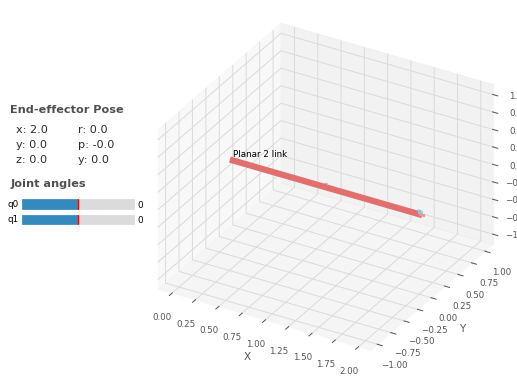

In [89]:
#illed code here
#import a planar one joint robot model
#mdl_planar1
robot = rtb.models.DH.Planar2()
print(robot)
e = robot.teach()
